In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

natality2016=pd.read_csv("../../data/Natality2016.csv")

# Hypothesis testing

Hypothesis testing is about choosing between two views, called **hypotheses**, on how data were generated (for example, SSR=1 or SSR=1.05 where SSR is the secondary sex ratio we defined in the [previous section](../../13/1/HypothesisTesting_1_Consistency.ipynb)).

Hypotheses, also described as **null** and **alternative** (see definitions below), should be specified before doing an analysis. *Testing* is a way to select the hypothesis that is better supported by the data. Note that the null hypothesis corresponds to what we called "the data-generating model" in the previous section.

**Ingredients of hypothesis testing:**
- A null hypothesis $H_0$ (e.g. SSR=1.05);
- An alternative hypothesis $H_A$ (e.g. SSR$\neq$ 1.05);
- A test statistic;
- A decision or a measure of significance that is obtained from the test statistic and its distribution under the null hypothesis.

In the [previous section](../../13/1/HypothesisTesting_1_Consistency.ipynb) we first investigated $H_0$: SSR=1 by simulating from the binomial distribution. The natural alternative there was $H_A:$ SSR$\neq$ 1. The test statistic we used was the number of boys.


Let's look in more detail at the components of a hypothesis test on a subset of these data. Assume that someone claims that Illinois (IL) has a different SSR based on what they have seen in a hospital they work for. You decide to investigate this using the natality data we introduced above. Before looking at the data, you need to decide on the first three ingredients:

**Null hypothesis** is generally the default view (generally believed to be true) and it all needs to lead to clear rules on how the data were generated. In this case, it makes sense to declare that $H_0:$ SSR_IL=1.05 (the probability of having a boy in Illinois is 0.512 which corresponds to a secondary sex ratio of 1.05). 

**Alternative hypothesis** should be the opposite of the null, but it can have variations (for example, we can use SSR_IL<1.05 or SSR_IL>1.05). Here, because there was no additional information provided, it is natural to use $H_A:$ SSR_IL$\neq$ 1.05. Note that the choice of alternative will impact the measure of significance that is discussed below.

**Test statistic** is the summary of the data that will be used for investigating consistency. We aim to choose the statistic that is most informative for the hypotheses we are investigating. In this case, we will use the observed SSR in IL as a test statistic.

Below are the cells that show the data and the histogram of test statistics generated under $H_0$.

In [20]:
natality2016[natality2016.State=="Illinois"][['Gender.Code','Births']].groupby('Gender.Code').sum()

,Births
Gender.Code,
F,75461
M,78894


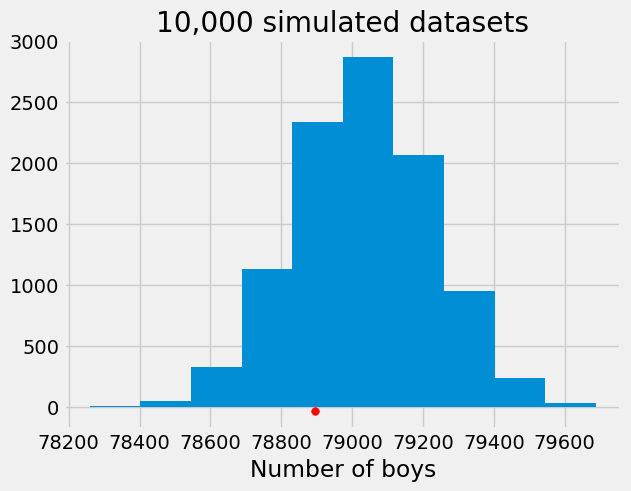

In [4]:
# plot results from random samples from a binomial distribution 
# n is the number of trials (same size as our population)
# p is the probability of being a boy
# size is the number of simulated datasets we will create

simulated_nr=np.random.binomial(75461+78894,0.512,size=10000)

plt.hist(simulated_nr)
plt.title('10,000 simulated datasets')
plt.xlabel("Number of boys")
plt.scatter(78894, -30, color='red', s=30);

In the above histogram, the observed statistic (indicated by the red dot) seems to be natural realization from the distribution summarized by the histogram. There seems to be no evidence against $H_0$. 

A more complete conclusion: using the number of boys as the test statistic, we find no evidence to reject $H_0$ (no evidence that the data is inconsistent with SSR=1.05).

## Significance as measured by the p-value

**P-values** capture the consistency of the data (test statistic) with the null hypothesis (distribution of the statistic under the null).

The p-value is the chance, **under the null hypothesis**, that the test statistic is equal to the observed value or is further in the direction of the alternative.
 
It is important to use correctly the specified alternative hypothesis for specifying the tail or tails of the null distribution of the statistic.

The decision is made using the null distribution of the test statistics (*probability distribution*); we will use an approximation given by an *empirical distribution*. P-value is about the tail area of the distribution.

In the above example, the proportion of simulations that lead to more extreme values than the one observed is:

In [7]:
sum(simulated_nr<=78894)/10000

0.2468

## Interpretation of p-values

**When $H_0$ is true**: p-value is (approximately) distributed uniform on the interval [0,1]:
- about half of p-values are larger than 0.5
- about 10% are smaller than 0.1
- about 5% are smaller than 0.05
 
A small p-value (typically smaller than 0.05 or 0.01) indicates evidence against the null hypothesis (smaller the p-value, stronger the evidence). A large p-value indicates no evidence (or weak evidence) against the null.